# **Problem Statement: Airbnb Hotel Booking Analysis.**

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.
This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

## **QUESTIONS**

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data:

1.  What are the different property types in the Dataset?
2.  Which neighbourhood group has the highest number of listings?
1.  Which neighbourhoods group have the highest average prices for Airbnb listings?
2.   Is there a relationship between the construction year of property and price?
1.   Who are the top 10 hosts by calculated host listing count?
2.  Are hosts with verified identities more likely to receive positive reviews?
1.  Is there a correlation between the price of a listing and its service fee?
2.  What is the average review rate number(eg.stars) on listings and does it vary on neighbourhood group and room type?
1. Are hosts with higher calculated host listings count are more likely to maintain higer availability throughout the year?
1.  Which room type has the highest average review rating?
2. Which neighborhood group has the highest average availability throughout the year?

















###**DATA WRANGLING**

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

###Imported required Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Creating Data Frame - Calling Data

In [19]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

### Access the Data

In [20]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


###Details about the DataSet

In [21]:
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (102599, 26)


In [22]:
print("No.of Rows in the Dataset:",df.shape[0])

No.of Rows in the Dataset: 102599


In [23]:
print("No.of Columns in the Dataset:",df.shape[1])

No.of Columns in the Dataset: 26


In [24]:
print("The size of the Dataset:",df.size,"Values")


The size of the Dataset: 2667574 Values


In [25]:
print("Statistics about Numerical Columns of the Dataset:\n",df.describe())

Statistics about Numerical Columns of the Dataset:
                  id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   

       instant_bookable  Construction year          price    service fee  \
count     102494.000000      102385.000000  102352.000000  102326.000000   
mean           0.497785        2012.487464     625.293536     125.026924   
min            0.000000        2003.000000      50.000000      10.000000   
25%            0.000000        2007.0000

In [26]:
print("Column Wise Information")
df.info()

Column Wise Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    

### Data Types of the Columns

In [27]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


### Null Report of the Dataset

In [28]:
df.isnull().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [29]:
print("No.of Nulls present in the dataset:",df.isnull().sum().sum())

No.of Nulls present in the dataset: 193503


###Duplicate Data Report

In [30]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [31]:
df.duplicated().sum()

np.int64(541)

In [32]:
##Brooklyn mispelt
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


# Problems Identified within the Data

1. 541 duplicated Records where found in the Data.
2. Insufficient information were recorded for the house_rules and Licence columns.
1. Dollar signs and commas recorded along with the values for price and service fee.
2. The currency for price and service fee were not added to the column's titles.
1. Missing values in some records
2. Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.
1. In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
2. Some outliers were identified in the availability 365 column.


# CLEAN THE DATA
##Steps to be Taken for Data Cleaning

1. Drop duplicated records.
2. Drop house_rules and license columns with insufficient data.
1. Remove all dollar signs in the price and service fee columns.
2. Remove all commas from the price and service fee columns.
1. Rename the price and service fee columns to include a dollar signs.
2. Drop all records with missing values.
1. Change all mismatched data types to the appropriate once.
Retry
2. Correct the spelling of 'brookln' to 'Brooklyn'
1. Get rid of outliers in the 'availability 365' column data












In [33]:
#Drop duplicate records
df.drop_duplicates(inplace = True)

#drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace= True)

#Convert price and service fee to string first
df['price'] = df['price'].astype(str)
df['service fee'] = df['service fee'].astype(str)

#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$','', regex= False)
df['service fee'] = df['service fee'].str.replace('$','', regex= False)

#Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',','', regex= False)
df['service fee'] = df['service fee'].str.replace(',','', regex= False)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns = {
    'price':'price_$',
    'service fee': 'service_fee_$'
}, inplace = True)

#Drop all records with missing values
df.dropna(inplace = True)

#Change all mismatched data types to the appropriate ones
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in availability 365 column data
df = df.drop(df[(df['availability 365'] < 0) | (df['availability 365'] > 365)].index)

print("\n✓ Data cleaning completed successfully!")
print(f"✓ Final dataset shape: {df.shape}")
print(f"\nCleaned columns:")
print(df.columns.tolist())


✓ Data cleaning completed successfully!
✓ Final dataset shape: (81303, 24)

Cleaned columns:
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


In [34]:
df.duplicated().value_counts()

,count
False,81303


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81303 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81303 non-null  object        
 1   NAME                            81303 non-null  object        
 2   host id                         81303 non-null  object        
 3   host_identity_verified          81303 non-null  object        
 4   host name                       81303 non-null  object        
 5   neighbourhood group             81303 non-null  object        
 6   neighbourhood                   81303 non-null  object        
 7   lat                             81303 non-null  float64       
 8   long                            81303 non-null  float64       
 9   country                         81303 non-null  object        
 10  country code                    81303 non-null  object        
 11  instan

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in data analysis that focuses on examining, summarizing, and visualizing data to reveal hidden patterns, trends, and meaningful insights. In the context of the Airbnb dataset, EDA provides a deeper understanding of booking behaviors, pricing variations, guest preferences, and host performance. Using techniques such as descriptive statistics, visualizations, and correlation analysis, EDA helps uncover relationships between variables and highlights factors that influence guest satisfaction and host success. This process not only clarifies the structure and quality of the dataset but also lays the foundation for predictive modeling and data-driven recommendations.

### Statistics Summary

In [36]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81303.000000,81303.000000,81303.000000,81303.000000,81112.000000,81083.000000,81303.000000,81303.000000,81303,81303.000000,81303.000000,81303.000000,81303.000000
mean,40.727261,-73.948213,0.497472,2012.493721,626.871795,125.341724,7.451053,31.915452,2019-06-23 21:38:55.662890496,1.390773,3.287689,7.134903,135.612745
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,0.000000
25%,40.687620,-73.982050,0.000000,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-07 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721240,-73.953540,0.000000,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,94.000000
75%,40.762490,-73.930395,1.000000,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056405,0.050657,0.499997,5.760097,331.761681,66.349267,28.408665,51.529714,NaN,1.760711,1.277768,29.914195,128.436067


### What are the different property types in the Dataset?

In [37]:
property_types  = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,42948
Private room,36624
Shared room,1621
Hotel room,110


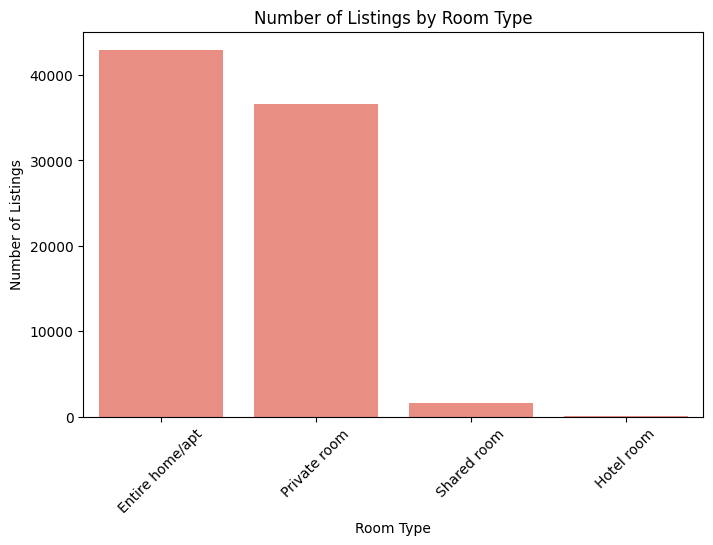

In [66]:
# Count of each room type
room_counts = df['room type'].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=room_counts.index, y=room_counts.values, color="salmon")
plt.title("Number of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()



### Which neighbourhood group has the highest number of listings?

In [39]:
hood_groups  = df['neighbourhood group'].value_counts().to_frame()
hood_groups

,count
neighbourhood group,
Brooklyn,33726
Manhattan,33557
Queens,10971
Bronx,2244
Staten Island,805


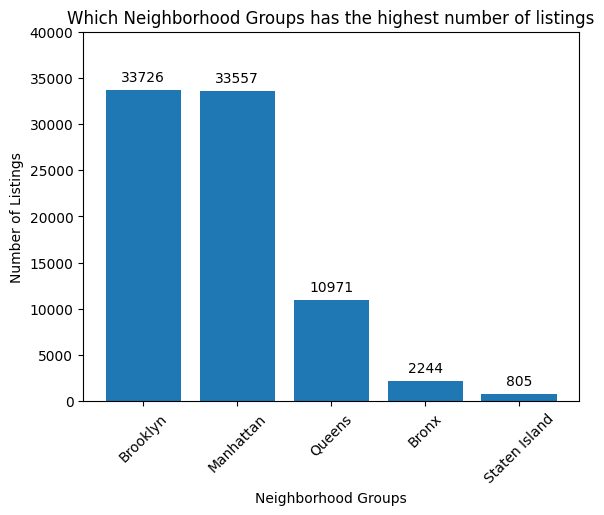

In [40]:
hood_group_bar = plt.bar(hood_groups.index, hood_groups.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_groups.loc[:,"count"], padding = 4 );
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of listings');



### Which neighbourhoods group have the highest average prices for Airbnb listings?

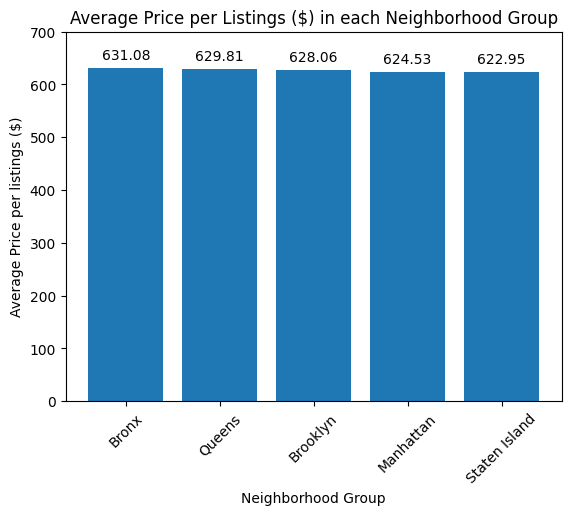

In [41]:

avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price_$'], 2), label_type = 'edge', padding = 4 );
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');


### Is there a relationship between the construction year of property and price?

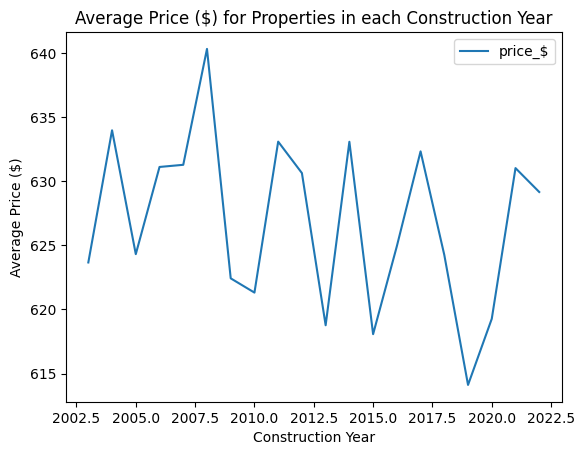

In [42]:
df.groupby(['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

### Who are the top 10 hosts by calculated host listing count?

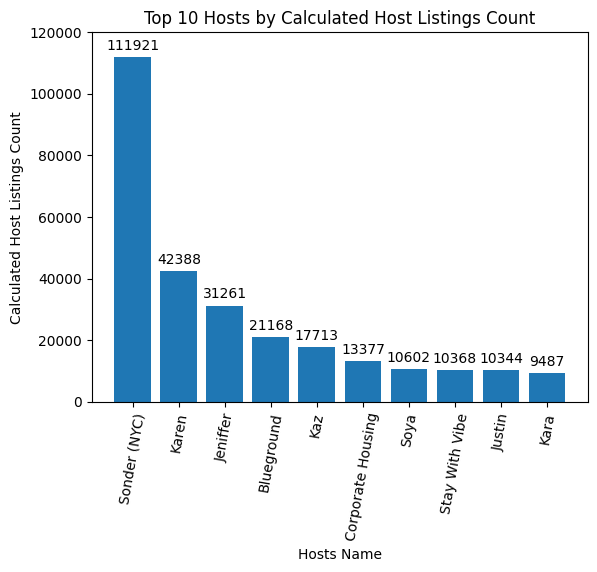

In [43]:

hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

### Are hosts with verified identities more likely to receive positive reviews?

In [45]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.290668
unconfirmed,3.284709


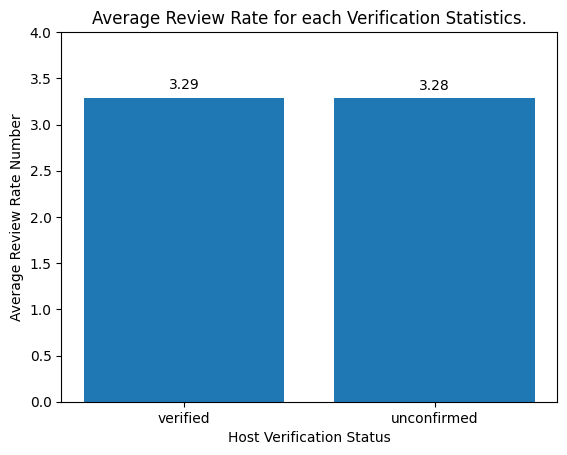

In [48]:
 review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
 plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4 );
 plt.ylim([0,4]);
 plt.xlabel('Host Verification Status');
 plt.ylabel('Average Review Rate Number');
 plt.title('Average Review Rate for each Verification Statistics.');

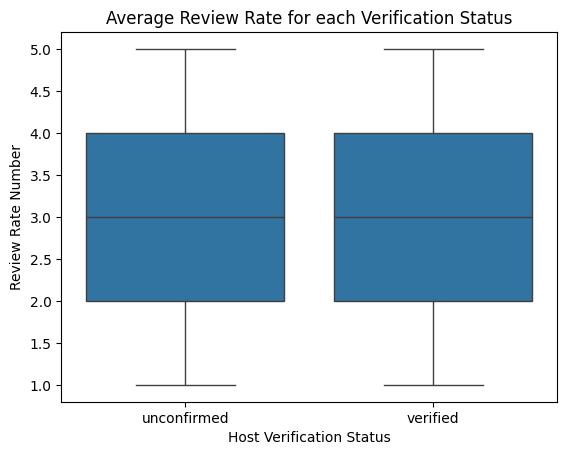

In [53]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

### Is there a correlation between the price of a listing and its service fee?

In [50]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909013549423)

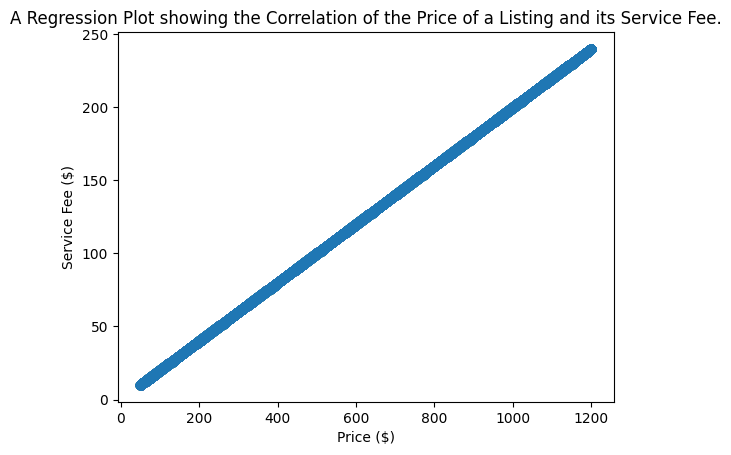

In [52]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

### What is the average review rate number(eg.stars) on listings and does it vary on neighbourhood group and room type?

In [56]:
ARRN = df.groupby(['neighbourhood group' , 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.377752
                    Private room               3.328439
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.252665
                    Hotel room                 3.833333
                    Private room               3.285156
                    Shared room                3.325581
Manhattan           Entire home/apt            3.276829
                    Hotel room                 3.500000
                    Private room               3.293395
                    Shared room                3.263482
Queens              Entire home/apt            3.355479
                    Hotel room                 3.750000
                    Private room               3.321072
                    Shared room                3.326087
Staten Island       Entire home/apt            3.338200
                    Private room               3.485788
                    Shared room                3.714286

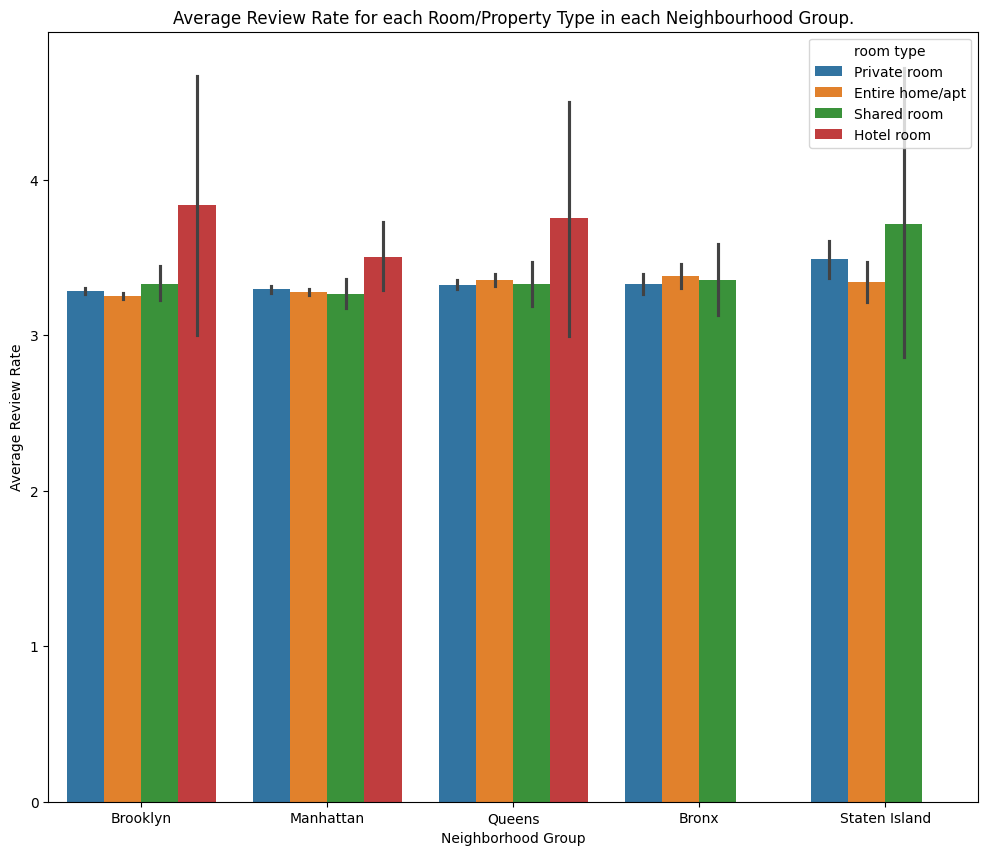

In [59]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type' );
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

### Are hosts with higher calculated host listings count are more likely to maintain higer availability throughout the year?

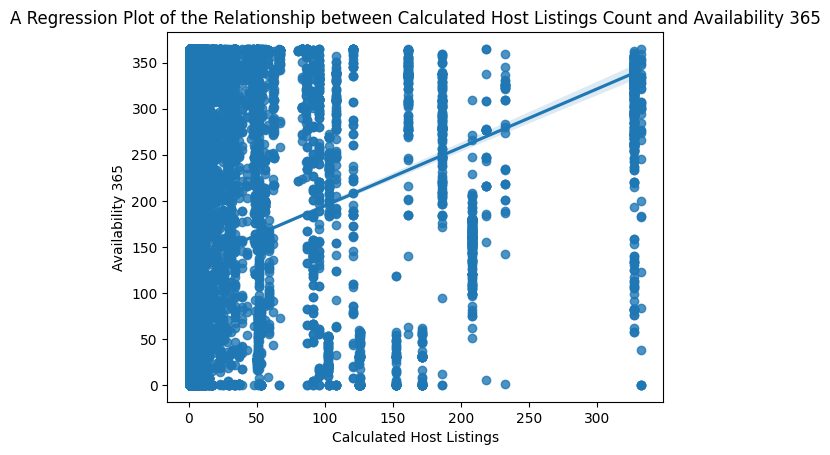

In [61]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [62]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.14797892314188046)

## Which room type has the highest average review rating?

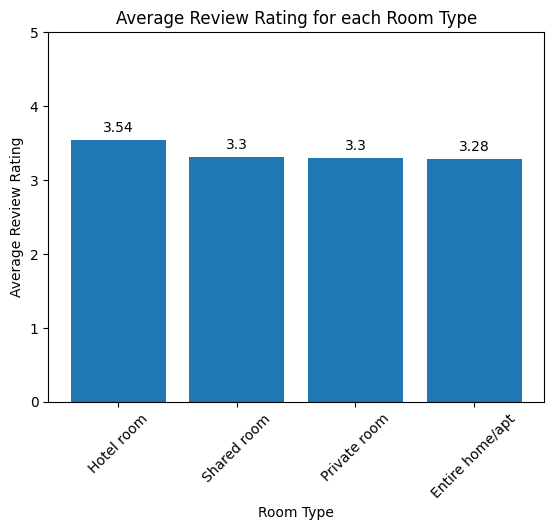

In [64]:
avg_review = df.groupby('room type')['review rate number'].mean().sort_values(ascending = False).to_frame()
avg_review_bar = plt.bar(avg_review.index, avg_review.loc[:,'review rate number']);
plt.bar_label(avg_review_bar, labels = round(avg_review.loc[:,'review rate number'], 2), label_type = 'edge', padding = 4);
plt.ylim([0,5]);
plt.xlabel('Room Type');
plt.ylabel('Average Review Rating');
plt.xticks(rotation = 45);
plt.title('Average Review Rating for each Room Type');

## Which neighbourhood group has the highest average availability throughout the year?

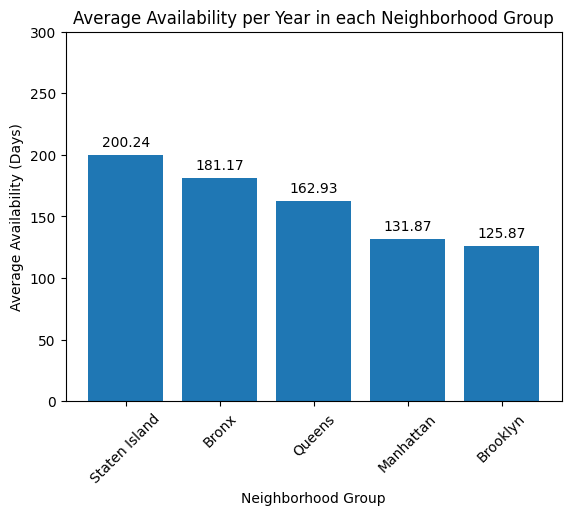

In [65]:
avg_availability = df.groupby('neighbourhood group')['availability 365'].mean().sort_values(ascending = False).to_frame()
avg_avail_bar = plt.bar(avg_availability.index, avg_availability.loc[:,'availability 365']);
plt.bar_label(avg_avail_bar, labels = round(avg_availability.loc[:,'availability 365'], 2), label_type = 'edge', padding = 4);
plt.ylim([0,300]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Availability (Days)');
plt.xticks(rotation = 45);
plt.title('Average Availability per Year in each Neighborhood Group');

## **CONCLUSION**


In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, exploring various aspects of the short-term rental market through exploratory data analysis. The analysis examined listing distributions, pricing patterns, host characteristics, and guest review trends to uncover meaningful insights. Key findings revealed that Manhattan has the highest average prices while Brooklyn leads in listing counts, and there is a strong correlation between listing price and service fee. The analysis also showed that hosts with verified identities tend to receive slightly higher review ratings, and certain room types maintain better availability throughout the year. Additionally, the study identified the top hosts by listing count and examined how construction year relates to property pricing. These insights provide a better understanding of the factors that influence Airbnb listings in New York City, including pricing strategies, host credibility, guest satisfaction patterns, and availability trends across different neighborhoods and property types.
